In [2]:
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where
import numpy as np


In [3]:
df = pd.read_csv("../dataset/DATA_FINAL.csv")


C:\Users\A2IN\AppData\Local\Temp\ipykernel_7428\3358253211.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../dataset/DATA_FINAL.csv")


In [4]:
df

,RESP,ABPmean,ABPsys,ABPdias,Tblood,SpO2,HR,PULSE,ALARM
0,15.0,89.0,114.0,78.0,37.1,100.0,101.0,100.0,False
1,15.0,89.0,114.0,78.0,37.1,100.0,101.0,101.0,False
2,15.0,89.0,113.0,78.0,37.1,100.0,101.0,101.0,False
3,15.0,89.0,113.0,78.0,37.1,100.0,101.0,101.0,False
4,15.0,89.0,114.0,78.0,37.1,100.0,101.0,101.0,False
...,...,...,...,...,...,...,...,...,...
131244,23.0,111.0,132.0,99.0,37.0,98.0,109.0,108.0,False
131245,23.0,111.0,132.0,100.0,37.0,98.0,109.0,108.0,False
131246,23.0,111.0,132.0,100.0,37.0,98.0,109.0,108.0,False
131247,23.0,112.0,133.0,101.0,37.0,98.0,109.0,108.0,False


In [5]:
df1 = df.loc[:,df.columns != "ALARM"]
df1["ABP"] = df.iloc[:,1:4].mean(axis = 1)
df1 = df1.drop(["ABPmean","ABPdias","ABPsys"],axis = 1)

In [6]:
df1


,RESP,Tblood,SpO2,HR,PULSE,ABP
0,15.0,37.1,100.0,101.0,100.0,93.666667
1,15.0,37.1,100.0,101.0,101.0,93.666667
2,15.0,37.1,100.0,101.0,101.0,93.333333
3,15.0,37.1,100.0,101.0,101.0,93.333333
4,15.0,37.1,100.0,101.0,101.0,93.666667
...,...,...,...,...,...,...
131244,23.0,37.0,98.0,109.0,108.0,114.000000
131245,23.0,37.0,98.0,109.0,108.0,114.333333
131246,23.0,37.0,98.0,109.0,108.0,114.333333
131247,23.0,37.0,98.0,109.0,108.0,115.333333


In [7]:
from sklearn import svm
from sklearn.linear_model import SGDOneClassSVM

In [8]:
df1 = df1.dropna()

In [ ]:
y_pred = OneClassSVM()
y_pred = y_pred.fit_predict(df1.loc[:"HR"])

In [16]:
cou = 0 
for i in y_pred:
    if i == 1:
        cou +=1
print(cou)

126484


In [17]:
cou = 0
for i in df["ALARM"]:
    if i == True:
        cou+=1
print(cou)
outlier_fraction = cou/len(df["ALARM"])
print(outlier_fraction)

4263
0.03248024746855214


In [13]:
y_pred = pd.DataFrame(y_pred,columns = ["predict"])
final_op = pd.concat([df,y_pred],axis = 1)

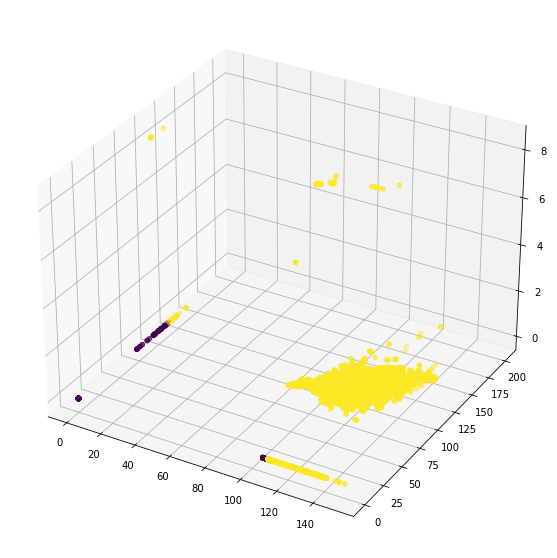

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')



x = final_op["HR"]
y = final_op["PULSE"]
z = final_op["RESP"]
c = final_op["predict"]+1 //2

ax.scatter(x,y,z, c = c)



plt.show()